In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("data.csv", low_memory=False)
edit = data.copy()

In [3]:
data.head(5)

,nombre_inmueble,aviso,precio,superficie,tipo,dormitorios,direccion,barrio,negocio,fecha
0,CASAS-ALQUILER-TEMPORAL-PUNTA-COLORADA-034,16579724,U$S 1.750,600 Mts,Casa,2 dormitorios,Av. Primera entre Rambla Costanera y 8 Guazubi...,Punta Colorada,Alquiler temporario,2021-01-03 00:00:00
1,"Alquilo Apto. 2 Dorm. Vista , 2 da Enero y Mar...",16735528,$U 800,NaN,Apartamento,2 dormitorios,Mi hijo el doctor y En Familia,Punta Del Este,Alquiler temporario,2021-01-03 00:00:00
2,"Casa en Cerro del Burro ""MIRADOR II""",13795860,U$S 100.000,300 Mts,Casa,1 dormitorio,... y Cerro del burro,Piriápolis,Venta,2021-01-03 00:00:00
3,Oficina Alquiler World Trade Center -WTC- Poci...,15655688,U$S 1.600,NaN,Oficina,NaN,... y Buceo,Buceo,Alquiler,2021-01-03 00:00:00
4,Terreno en Punta Colorada,12805785,U$S 67.000,615 Mts,Terreno,NaN,TE201282 y Punta colorada,Punta Colorada,Venta,2021-01-03 00:00:00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96583 entries, 0 to 96582
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nombre_inmueble  96462 non-null  object
 1   aviso            96583 non-null  object
 2   precio           96462 non-null  object
 3   superficie       81049 non-null  object
 4   tipo             96462 non-null  object
 5   dormitorios      75070 non-null  object
 6   direccion        96128 non-null  object
 7   barrio           96462 non-null  object
 8   negocio          96462 non-null  object
 9   fecha            96583 non-null  object
dtypes: object(10)
memory usage: 7.4+ MB


Clasificación por:
    - tipo de finca
    - tipo de negocio: afecta el precio (alquileres mensuales)

In [5]:
data["negocio"].value_counts()

Venta                  66165
Alquiler               15553
Alquiler temporario    14744
Name: negocio, dtype: int64

In [6]:
data["tipo"].value_counts()

Apartamento    45098
Casa           29972
Terreno        11076
Oficina         4455
Local           3944
Campo           1375
Comercio         202
Edificio         157
Garage           111
Piezas            66
Otro               6
Name: tipo, dtype: int64

In [7]:
data["direccion"].isna().sum(), data["direccion"].count() #Conteo de direcciones

(455, 96128)

In [8]:
data["barrio"].isna().sum(), data["barrio"].count() #Conteo de barrio, posibilidad de imputar direcciones faltantes

(121, 96462)

In [9]:
data["precio"].isna().sum()
#Si el estudio es sobre oportunidad de inversión, estos datos deben eliminarse

121

In [10]:
data["fecha"] #Irrelevante para el EDA, eliminable

0        2021-01-03 00:00:00
1        2021-01-03 00:00:00
2        2021-01-03 00:00:00
3        2021-01-03 00:00:00
4        2021-01-03 00:00:00
                ...         
96578    2021-12-07 00:00:00
96579    2021-12-07 00:00:00
96580    2021-12-07 00:00:00
96581    2021-12-07 00:00:00
96582    2021-12-07 00:00:00
Name: fecha, Length: 96583, dtype: object

In [11]:
edit.drop(labels="fecha", axis=1, inplace=True)

In [12]:
municipios = {"B": ["Aguada", "parte de La Comercial", "Tres Cruces", "Cordón", "Parque Rodó", "Palermo", "Sur", "Ciudad Vieja", "Centro"],
"E": ["Unión","Malvín Norte","Malvín Nuevo","Las Canteras","Carrasco Norte","Carrasco","Punta Gorda","Malvín","Buceo","La Blanqueada"],
"C": ["Prado", "Aires Puros", "Atahualpa", "Nueva Savona", "Brazo Oriental", "Mercado Modelo", "Bolívar", "Larrañaga", "Jacinto Vera", "La Figurita", "La Comercial", "Villa Muñoz", "Retiro", "Goes", "Aguada", "una parte del Puerto", "Capurro", "Bella Vista", "Reducto"],
"CH": ["La Blanqueada", "Parque Batlle", "Villa Dolores", "Pocitos", "Punta Carretas", "Tres Cruces", "Larrañaga", "Buceo"]}

In [13]:
barrios_ok = []
for value in list(municipios.values()):
    barrios_ok.extend(value)

In [14]:
for index in edit.index:
    if edit["barrio"][index] not in barrios_ok:
        edit.drop(index, axis=0, inplace=True)
# Filtrado por municipio

In [15]:
edit.drop_duplicates("aviso")
edit.reset_index(drop=True, inplace=True)
#Eliminación de avisos repetidos, reseteo de índice

In [16]:
edit.drop(labels="aviso", axis=1, inplace=True)
#Se elimina la columna aviso

# Mapeo de negocio y tipo: a valor ordinal

In [17]:
edit.drop(index= edit[edit['negocio'].isna()==True].index.values, inplace=True)
edit

,nombre_inmueble,precio,superficie,tipo,dormitorios,direccion,barrio,negocio
0,Oficina Alquiler World Trade Center -WTC- Poci...,U$S 1.600,NaN,Oficina,NaN,... y Buceo,Buceo,Alquiler
1,Oficina Sosa - Local Con Vivienda Alquilado En...,U$S 125.000,NaN,Local,NaN,Oficina Sosa - Local Con Vivienda Alquilado En...,Brazo Oriental,Venta
2,Excelente Local Amplio - Gran Sótano Centro,$U 25.000,NaN,Local,NaN,Soriano y Julio Herrera Y Obes,Centro,Alquiler
3,Terreno en el Centro,U$S 220.000,442 Mts,Terreno,NaN,Wilson Ferreira Aldunate y Durazno,Centro,Venta
4,Impecable apartamento en zona privilegiada.,U$S 380.000,130 Mts,Apartamento,3 dormitorios,Ramon Fernandez y Bulevar Artigas,Punta Carretas,Venta
...,...,...,...,...,...,...,...,...
32276,"Gran Casa en Calle Exclusiva, Punta Carretas",U$S 740.000,NaN,Casa,más de 4 dormitorios,Baez y Montero,Punta Carretas,Venta
32277,Hermoso Apartamento en Pocitos,$U 21.000,NaN,Apartamento,1 dormitorio,Scoseria y Roque Graseras,Pocitos,Alquiler
32278,"Town Park, Con Renta,amplio,exonera imp,no pag...",U$S 160.000,NaN,Apartamento,3 dormitorios,Millan y Instrucciones,Prado,Venta
32279,VENDE APARTAMENTO 1 DORMITORIO - PARA CONSULTO...,U$S 87.000,39 Mts,Apartamento,1 dormitorio,ITALIA y BRITO FORESTI,Parque Batlle,Venta


In [18]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

edit_negocio = edit[["negocio"]]
negocio_encoded = ordinal_encoder.fit_transform(edit_negocio)
ref_negocio_encode = dict(zip(ordinal_encoder.categories_[0],np.arange(0,3)))

In [19]:
edit_tipo = edit[["tipo"]]
tipo_encoded = ordinal_encoder.fit_transform(edit_tipo)
ordinal_encoder.categories_

[array(['Apartamento', 'Campo', 'Casa', 'Comercio', 'Edificio', 'Garage',
        'Local', 'Oficina', 'Piezas', 'Terreno'], dtype=object)]

In [20]:
tipo_encoded = np.array(tipo_encoded, dtype="int").reshape(1,-1)
enc = []
lista_tipo = []
for item in np.unique(tipo_encoded):
    enc.append(np.count_nonzero(tipo_encoded == item))
for index in enc:
    lista_tipo.append(edit_tipo.value_counts()[edit_tipo.value_counts() == index].index[0][0])
ref_tipo_encode = dict(zip(lista_tipo,np.unique(tipo_encoded)))

In [21]:
ref_tipo_encode, ref_negocio_encode

({'Apartamento': 0,
  'Campo': 1,
  'Casa': 2,
  'Comercio': 3,
  'Edificio': 4,
  'Garage': 5,
  'Local': 6,
  'Oficina': 7,
  'Piezas': 8,
  'Terreno': 9},
 {'Alquiler': 0, 'Alquiler temporario': 1, 'Venta': 2})

In [22]:
edit["negocio"] = edit["negocio"].map(ref_negocio_encode)
edit["tipo"] = edit["tipo"].map(ref_tipo_encode)

In [23]:
edit

,nombre_inmueble,precio,superficie,tipo,dormitorios,direccion,barrio,negocio
0,Oficina Alquiler World Trade Center -WTC- Poci...,U$S 1.600,NaN,7,NaN,... y Buceo,Buceo,0
1,Oficina Sosa - Local Con Vivienda Alquilado En...,U$S 125.000,NaN,6,NaN,Oficina Sosa - Local Con Vivienda Alquilado En...,Brazo Oriental,2
2,Excelente Local Amplio - Gran Sótano Centro,$U 25.000,NaN,6,NaN,Soriano y Julio Herrera Y Obes,Centro,0
3,Terreno en el Centro,U$S 220.000,442 Mts,9,NaN,Wilson Ferreira Aldunate y Durazno,Centro,2
4,Impecable apartamento en zona privilegiada.,U$S 380.000,130 Mts,0,3 dormitorios,Ramon Fernandez y Bulevar Artigas,Punta Carretas,2
...,...,...,...,...,...,...,...,...
32276,"Gran Casa en Calle Exclusiva, Punta Carretas",U$S 740.000,NaN,2,más de 4 dormitorios,Baez y Montero,Punta Carretas,2
32277,Hermoso Apartamento en Pocitos,$U 21.000,NaN,0,1 dormitorio,Scoseria y Roque Graseras,Pocitos,0
32278,"Town Park, Con Renta,amplio,exonera imp,no pag...",U$S 160.000,NaN,0,3 dormitorios,Millan y Instrucciones,Prado,2
32279,VENDE APARTAMENTO 1 DORMITORIO - PARA CONSULTO...,U$S 87.000,39 Mts,0,1 dormitorio,ITALIA y BRITO FORESTI,Parque Batlle,2


# Limpieza de precio 

In [24]:
edit["precio"].isna().sum() #No hay valores faltantes

0

In [25]:
edit['precio'] = edit['precio'].replace('\$','', regex = True)
uyu = edit['precio'].str.contains('U ', case=True, regex=True)
UYUloc = uyu[uyu==True].index.values
edit['precio'][UYUloc] = edit['precio'].iloc[UYUloc].str.replace('U','')

In [26]:
edit['precio'] = edit['precio'].str.replace('US ','')
edit['precio'] = edit['precio'].str.replace('.','', regex = True)
edit['precio'] = edit['precio'].astype(str).astype(int).astype(float)

Las siguientes dos líneas de código no fueron utilizadas ya que correr el código toma mucho tiempo. Lo dejamos a modo demostrativo pero la conversión fue realizada por valor constante.

In [27]:
import yfinance as yahooFinance
from datetime import datetime, timedelta

ModuleNotFoundError: No module named 'yfinance'

In [28]:
def convert_currency(src, dst, amount):
    # construct the currency pair symbol
    symbol = f"{src}{dst}=X"
    FX = yahooFinance.Ticker(symbol)
    
    # extract minute data of the recent 2 days
    latest_data = FX.history(period = '1d')
    
    # get the latest datetime
    last_updated_datetime = latest_data.index[-1].to_pydatetime()
    
    # get the latest price
    latest_price = latest_data['Close'].iloc[-1]
    
    # return the latest datetime with the converted amount
    return latest_price * amount

In [29]:
edit['precio'][UYUloc].apply(lambda x: x/40)
edit.rename(columns = {'precio':'precio U$S'}, inplace = True)

In [30]:
edit

,nombre_inmueble,precio U$S,superficie,tipo,dormitorios,direccion,barrio,negocio
0,Oficina Alquiler World Trade Center -WTC- Poci...,1600.0,NaN,7,NaN,... y Buceo,Buceo,0
1,Oficina Sosa - Local Con Vivienda Alquilado En...,125000.0,NaN,6,NaN,Oficina Sosa - Local Con Vivienda Alquilado En...,Brazo Oriental,2
2,Excelente Local Amplio - Gran Sótano Centro,25000.0,NaN,6,NaN,Soriano y Julio Herrera Y Obes,Centro,0
3,Terreno en el Centro,220000.0,442 Mts,9,NaN,Wilson Ferreira Aldunate y Durazno,Centro,2
4,Impecable apartamento en zona privilegiada.,380000.0,130 Mts,0,3 dormitorios,Ramon Fernandez y Bulevar Artigas,Punta Carretas,2
...,...,...,...,...,...,...,...,...
32276,"Gran Casa en Calle Exclusiva, Punta Carretas",740000.0,NaN,2,más de 4 dormitorios,Baez y Montero,Punta Carretas,2
32277,Hermoso Apartamento en Pocitos,21000.0,NaN,0,1 dormitorio,Scoseria y Roque Graseras,Pocitos,0
32278,"Town Park, Con Renta,amplio,exonera imp,no pag...",160000.0,NaN,0,3 dormitorios,Millan y Instrucciones,Prado,2
32279,VENDE APARTAMENTO 1 DORMITORIO - PARA CONSULTO...,87000.0,39 Mts,0,1 dormitorio,ITALIA y BRITO FORESTI,Parque Batlle,2


# Limpieza y corrección de dormitorios

In [31]:
ref_tipo_encode

{'Apartamento': 0,
 'Campo': 1,
 'Casa': 2,
 'Comercio': 3,
 'Edificio': 4,
 'Garage': 5,
 'Local': 6,
 'Oficina': 7,
 'Piezas': 8,
 'Terreno': 9}

In [32]:
# Le asignamos 0 en la columna de dormitorios para los tipos que tienen NaN solamente como dormitorio. 
# Decidimos ponerle 0 a los valores NaN de dormitorios de el tipo de Edificio ya que, aunque teniamos alguna informacion
# con la descripcion en nombre_inmueble, esta era muy variada y casi ningun dato podria ser rescatado por esta. 

tipos = [1,3,4,5,6,7,8,9]
#Al haber sido tratado el atributo tipo, se usa el valor ordinal
for tipo in tipos:
    edit["dormitorios"].loc[(edit["tipo"] == tipo) & (edit["dormitorios"].isna()==True)] = 0

In [33]:
edit["dormitorios"].value_counts()

2 dormitorios           8267
0                       6617
3 dormitorios           6255
1 dormitorio            5499
Monoambiente            2494
4 dormitorios           1942
más de 4 dormitorios    1207
Name: dormitorios, dtype: int64

In [41]:
dic_dorms = {
    0:0,
    "Monoambiente":1,
    "1 dormitorio":1,
    "2 dormitorios":2,
    "3 dormitorios":3,
    "4 dormitorios":4,
    "más de 4 dormitorios":5,}

In [43]:
edit["dormitorios"] = edit["dormitorios"].map(dic_dorms)

In [72]:
import plotly.express as px
for value in edit["negocio"].unique():
    fig = px.box(edit[edit["negocio"]==value], x="tipo", y="precio U$S", title=("Negocio: "+list(ref_negocio_encode.keys())[list(ref_negocio_encode.values()).index(value)]))
    fig.show()

In [73]:
edit

,nombre_inmueble,precio U$S,superficie,tipo,dormitorios,direccion,barrio,negocio
0,Oficina Alquiler World Trade Center -WTC- Poci...,1600.0,NaN,7,0,... y Buceo,Buceo,0
1,Oficina Sosa - Local Con Vivienda Alquilado En...,125000.0,NaN,6,0,Oficina Sosa - Local Con Vivienda Alquilado En...,Brazo Oriental,2
2,Excelente Local Amplio - Gran Sótano Centro,25000.0,NaN,6,0,Soriano y Julio Herrera Y Obes,Centro,0
3,Terreno en el Centro,220000.0,442 Mts,9,0,Wilson Ferreira Aldunate y Durazno,Centro,2
4,Impecable apartamento en zona privilegiada.,380000.0,130 Mts,0,3,Ramon Fernandez y Bulevar Artigas,Punta Carretas,2
...,...,...,...,...,...,...,...,...
32276,"Gran Casa en Calle Exclusiva, Punta Carretas",740000.0,NaN,2,5,Baez y Montero,Punta Carretas,2
32277,Hermoso Apartamento en Pocitos,21000.0,NaN,0,1,Scoseria y Roque Graseras,Pocitos,0
32278,"Town Park, Con Renta,amplio,exonera imp,no pag...",160000.0,NaN,0,3,Millan y Instrucciones,Prado,2
32279,VENDE APARTAMENTO 1 DORMITORIO - PARA CONSULTO...,87000.0,39 Mts,0,1,ITALIA y BRITO FORESTI,Parque Batlle,2


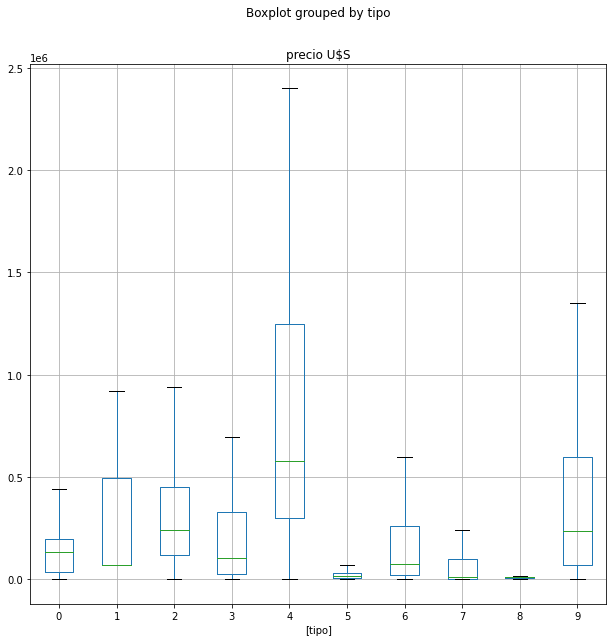

In [77]:
plot_data = edit[edit['tipo'].isin(edit['tipo'].unique())]
plot_data = plot_data[['tipo', 'precio U$S']]
#plot_data = plot_data[plot_data['tipo']]
plot_data.boxplot(by='tipo', grid=True, figsize=(10,10), 
                  showfliers=False #le quite todos los puntos para que se visualize mejor, si ponemos True se ven los outliers
                 )

plt.show()